# Medical Appointment Data Analysis

### by Omar BOUGACHA



# Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 



In this project, I propose a full application of the data analysis process. I start by loading the wrangling part, in which, I load the data tables. Then, the data quality and tidiness assessment is conducted. In part three, I present the data cleaning process. I present the exploratory data analysis in which I answer the analysis questions. Finally, I build a machine learning based model to predict if a patient will miss his appointment.

# Data Wrangling

### Data Gathering:
The data used in this project is given directly into a csv file. The task here is to only load the data into dataframes.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

base_color = sns.color_palette()[0]

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [3]:
data_df = pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
data_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Data Quality & Tidiness Assessment:

In this part of the project, we assess the data quality problems (completness, accuracy, consistancy, uniqueness, etc) and the data tidiness issues (more than one observation per row, having values for columns, more than one observational unit per table, etc). Lets start with the data quality assessment.

#### Data Quality: Missing Values

Lets assess the data for completness. 

In [4]:
data_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

None of the features present missing values. This dataset do not suffer any completness issues.

#### Data Quality: Accuracy

Accuracy is defined as presenting the correct values for each feature in the correct format. Since we cannot check if the given values for each column are true or false (we do not have another data to cross reference this point), we propose to focus the accuracy assessment on the used type of data for each column.

In [5]:
data_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

From the types of the features, we can detect several problems: 
* PatientId type should be integer and not float
* ScheduledDay and AppointmentDay should be of type date time and not string
* Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, and No-show should be of type Boolean.

Plus for the Handcap feature should be boolean and we have values of 1, 2, etc. This will be fixed when changing the type of feature to boolean

In [6]:
data_df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We can note that we have a problem with the age. The minimum value should be equal to 0 (meaning a new born.) negative values should be eliminated.

#### Data Quality: Consistency

In the consistency check, we are looking if there are some features in which several values are used to describe the same thing. We also check for coherent names of features.

The dataset present a consistency issue in the name of hipertension feature should be hypertension. 

In [7]:
data_df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

#### Data Quality: Uniqueness

Lets check for duplicated records

In [8]:
data_df.duplicated().sum()

0

The data does not present any duplicated records. 

#### Data Tidiness: 

A tidy dataset should verify the following 3 conditions:

* each observation is a row,
* each feature (characteristic) is a column, and
* each observational unit is a table.

By looking in the data table, we can see that each row contains two types of information:
* Appointement related information and 
* Patient related information 

To make the data tidy, each category should be classified into a table. 

### Data Cleaning:
The data cleaning process should be well documented to keep track of the modification. Each detected issue is treated in a Define-Code-Test structure. In the define phase, we present what action is to be taken for such issue. In the code, we place the used code for action. Finally, we test the outcome of the modification.

In [9]:
cleaned_data = data_df.copy()

* Consistency issue: Hipertension to Hypertension

##### Define: 
* Rename the column Hipertension to Hypertension using the rename method

##### Code: 

In [10]:
cleaned_data.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

##### Test:

In [11]:
cleaned_data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


* Accuracy issue: negative age values: 

##### Define: 
* drop the observations with negative age values. 

##### Code: 

In [12]:
neg_age_idx = cleaned_data[cleaned_data['Age']<0].index.tolist()
cleaned_data.drop(neg_age_idx, inplace = True)
cleaned_data.reset_index(drop=True, inplace=True)

##### Test:

In [13]:
cleaned_data[cleaned_data['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


* PatientId should be of type integer and not float

##### Define: 
* Change the type of PatientId from float to integer

##### Code: 

In [14]:
cleaned_data['PatientId'] = cleaned_data['PatientId'].astype('int64')

##### Test:

In [15]:
cleaned_data.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

* ScheduledDay and AppointmentDay should be of type date time and not string

##### Define:
* Change the type of ScheduledDay and AppointmentDay to datetime using the to_datetime function

##### Code: 

In [16]:
cleaned_data['ScheduledDay'] = pd.to_datetime(cleaned_data['ScheduledDay'])
cleaned_data['AppointmentDay'] = pd.to_datetime(cleaned_data['AppointmentDay'])

##### Test:

In [17]:
cleaned_data.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

* Scholarship, Hypertension, Diabetes, Alcoholism, and No-show should be of type Boolean.

##### Define:
* change type to boolean of (Scholarship, Hypertension, Diabetes, Alcoholism, Handcap, and No-show)

##### Code: 

In [18]:
cleaned_data['Scholarship'] = cleaned_data['Scholarship'].astype('bool')
cleaned_data['Hypertension'] = cleaned_data['Hypertension'].astype('bool')
cleaned_data['Diabetes'] = cleaned_data['Diabetes'].astype('bool')
cleaned_data['Alcoholism'] = cleaned_data['Alcoholism'].astype('bool')
cleaned_data["Handcap"] = cleaned_data['Handcap'].apply(lambda x: True if x>=1 else False)
cleaned_data['No-show'] = cleaned_data['No-show'].apply(lambda x : True if x=='Yes' else False)

##### Test:


In [19]:
cleaned_data.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handcap                          bool
SMS_received                    int64
No-show                          bool
dtype: object

* Tidiness issue: two observational units in the same table

##### Define: 
* Separate Patient information and Appointment information into two tables. 

##### Code:

In [20]:
appointment_df = cleaned_data[['AppointmentID', 'PatientId', 'ScheduledDay','AppointmentDay', 
                               'SMS_received', 'No-show']]
patient_df = cleaned_data[['PatientId', 'Gender','Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
                             'Diabetes', 'Alcoholism', 'Handcap']]

Lets check that the patient table does not contain duplicated rows. Since the same patient could have booked several appointments.

In [21]:
patient_df['PatientId'].duplicated().sum()

48228

So yes several patient have booked appointments several time. We should clean this point. 

##### Define:
* Drop all duplicated entries in the patient table using drop_duplicates

##### Code: 


In [22]:
idx = patient_df[patient_df['PatientId'].duplicated()].index.tolist()
patient_df.drop(idx,inplace=True)
patient_df.reset_index(drop=True, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##### Test: 

In [23]:
patient_df.duplicated().sum()

0

We have now two tables one for the appointments and the other one for the patients. These tables are in a good quality and tidy. We save these tables. 

In [24]:
appointment_df.to_csv('Appointment_Data.csv', index=False)
patient_df.to_csv('Patient_Data.csv', index=False)

# Exploratory Data Analysis

In this process, we have 3 types of analysis:

* univariate analysis in which we plot each variable alone and analyze its characteristics,
* bivariate analysis in which we analyze the relationship between each two variables, and
* multivariate analysis in which we analyze the relationship between different variables.

Each of these analysis are presented in the following subsections.

### Univariate Analysis (Patient Table)

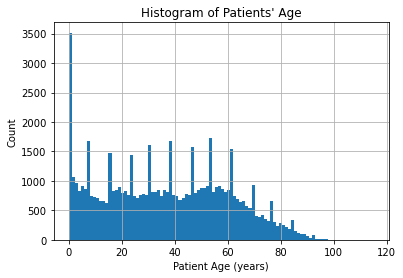

In [25]:
patient_df['Age'].hist(bins=100)
plt.xlabel('Patient Age (years)')
plt.ylabel('Count')
plt.title("Histogram of Patients' Age")
plt.show()

The patients, in this dataset, are of all ages. We also note that we have a high number of newborns. Moreover, some ages have a high peak this might correspond to vaccine ages or something like this.

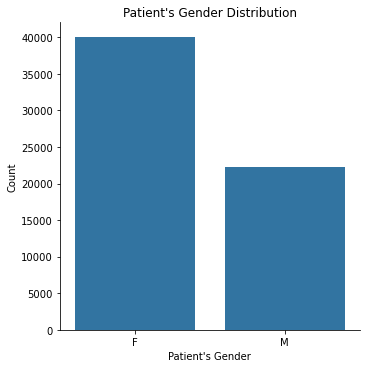

In [26]:
sns.catplot(x='Gender', data = patient_df, kind='count', color=base_color)
plt.xlabel("Patient's Gender")
plt.ylabel("Count")
plt.title("Patient's Gender Distribution")
plt.show()

In this study, we have more female subjects that male subjects.

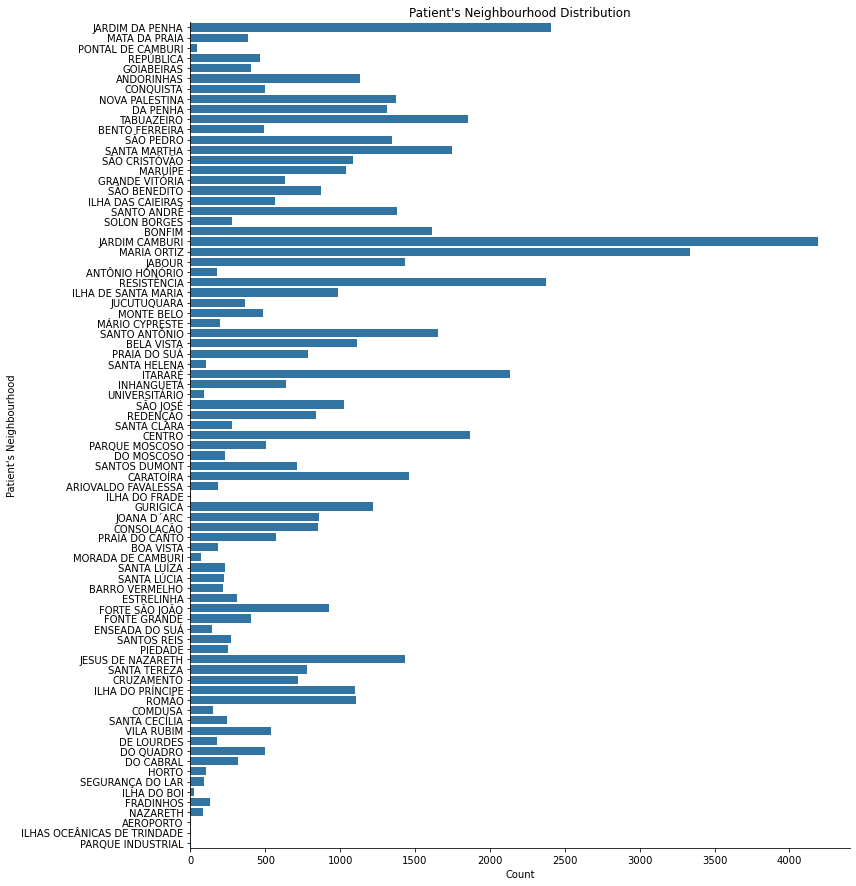

In [27]:
sns.catplot(y='Neighbourhood', data = patient_df, kind='count', color=base_color, height=12)
plt.ylabel("Patient's Neighbourhood")
plt.xlabel("Count")
plt.title("Patient's Neighbourhood Distribution")
plt.show()

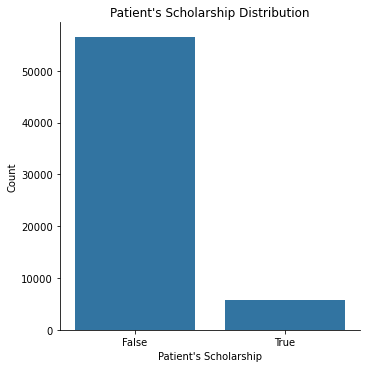

In [28]:
sns.catplot(x='Scholarship', data = patient_df, kind='count', color=base_color)
plt.xlabel("Patient's Scholarship")
plt.ylabel("Count")
plt.title("Patient's Scholarship Distribution")
plt.show()

Most subjects of this study do not have a medial aid from the government.

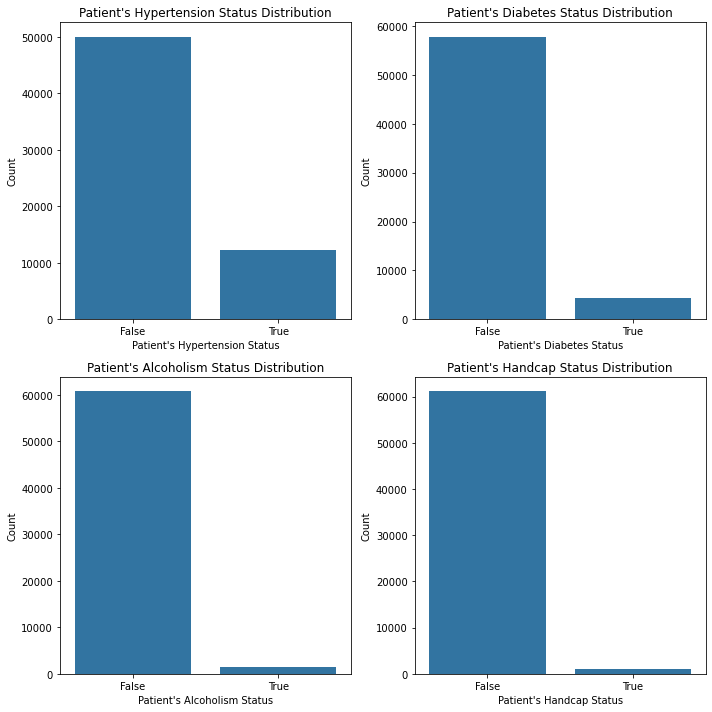

In [29]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
g = sns.countplot(x='Hypertension', data = patient_df, color=base_color, ax=ax1)
ax1.set_xlabel("Patient's Hypertension Status")
ax1.set_ylabel("Count")
ax1.set_title("Patient's Hypertension Status Distribution")
g = sns.countplot(x='Diabetes', data = patient_df, color=base_color, ax=ax2)
ax2.set_xlabel("Patient's Diabetes Status")
ax2.set_ylabel("Count")
ax2.set_title("Patient's Diabetes Status Distribution")
g = sns.countplot(x='Alcoholism', data = patient_df, color=base_color, ax=ax3)
ax3.set_xlabel("Patient's Alcoholism Status")
ax3.set_ylabel("Count")
ax3.set_title("Patient's Alcoholism Status Distribution")
g = sns.countplot(x='Handcap', data = patient_df, color=base_color, ax=ax4)
ax4.set_xlabel("Patient's Handcap Status")
ax4.set_ylabel("Count")
ax4.set_title("Patient's Handcap Status Distribution")
plt.tight_layout()
plt.show()

### Univariate Analysis (Appointment Table)

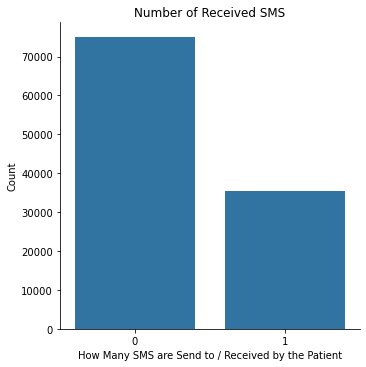

In [30]:
sns.catplot(x='SMS_received', data = appointment_df, kind='count', color=base_color)
plt.xlabel("How Many SMS are Send to / Received by the Patient")
plt.ylabel("Count")
plt.title("Number of Received SMS")
plt.show()

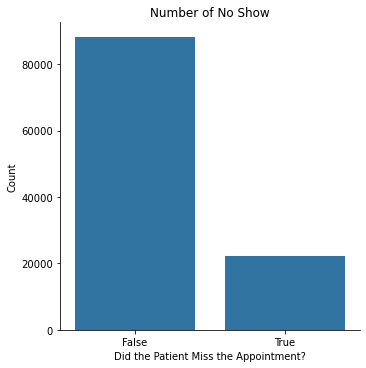

In [31]:
sns.catplot(x='No-show', data = appointment_df, kind='count', color=base_color)
plt.xlabel("Did the Patient Miss the Appointment?")
plt.ylabel("Count")
plt.title("Number of No Show")
plt.show()

#### Feature Engineering

Now, we have two features about the date and time of booking the appointment and the date of the appointment. From these two features we can extract several features such as: 
* the Day-of-Week of the appointment, 
* how many days between the call for booking and the appointment date, and
* At which hour the call for booking was made.

These features are added to the table with the following code:

In [32]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

In [33]:
appointment_df['Appointment_w_d'] = appointment_df['AppointmentDay'].apply(lambda x: weekDays[x.weekday()])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
appointment_df['DaysToAppointment'] = appointment_df.apply(lambda x: 0 if x['AppointmentDay']<x['ScheduledDay'] else (x['AppointmentDay']-x['ScheduledDay']).days, axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
appointment_df['CallHour'] = appointment_df['ScheduledDay'].apply(lambda x: x.hour)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
appointment_df.head(2)

,AppointmentID,PatientId,ScheduledDay,AppointmentDay,SMS_received,No-show,Appointment_w_d,DaysToAppointment,CallHour
0,5642903,29872499824296,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,False,Friday,0,18
1,5642503,558997776694438,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,False,Friday,0,16


Lets analyze the new variables:

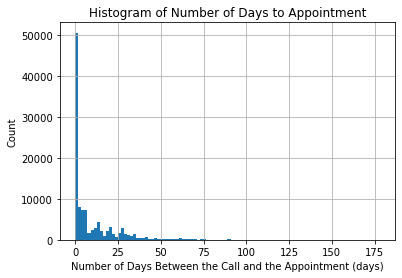

In [37]:
appointment_df['DaysToAppointment'].hist(bins=100)
plt.xlabel('Number of Days Between the Call and the Appointment (days)')
plt.ylabel('Count')
plt.title('Histogram of Number of Days to Appointment')
plt.show()

We can see that the distribution is skewed to the right. With the majority of appointements being scheduled the during the same day.

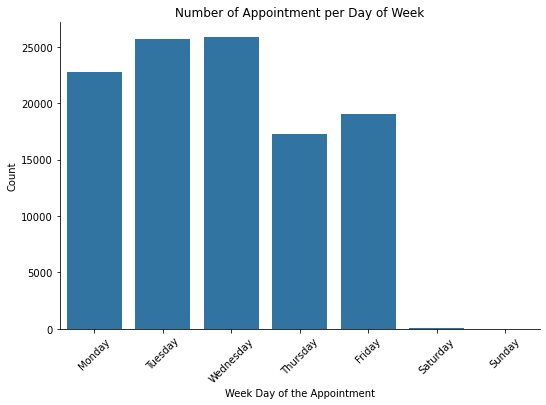

In [38]:
sns.catplot(x='Appointment_w_d', data = appointment_df, kind='count', order = weekDays, color=base_color, aspect=1.5)
plt.xticks(rotation=45)
plt.xlabel("Week Day of the Appointment")
plt.ylabel("Count")
plt.title("Number of Appointment per Day of Week")
plt.show()

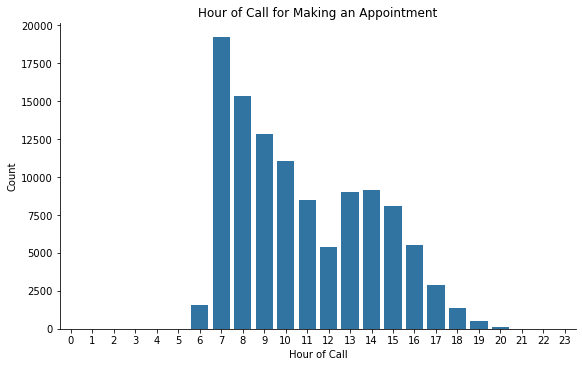

In [39]:
sns.catplot(x='CallHour', data = appointment_df, kind='count', order = range(24), color=base_color, aspect=1.6)
plt.xlabel("Hour of Call")
plt.ylabel("Count")
plt.title("Hour of Call for Making an Appointment")
plt.show()

We can see that the hours of the call have a right skewed distribution. 

### Bivariate Analysis (Patient Table)

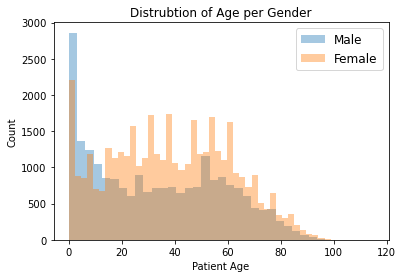

In [40]:
d_m = patient_df[patient_df['Gender']=='M']
sns.distplot(d_m['Age'],kde=False, label='Male')
d_f = patient_df[patient_df['Gender']=='F']
sns.distplot(d_f['Age'],kde=False, label='Female')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Age per Gender')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

We can note that patient at young age are mostly males. While starting from the age of 20 the two genders follow almost the same distribution. We can also note that the peaks at certain age are generated by the female patients. 

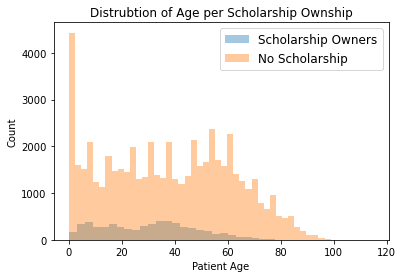

In [41]:
d_m = patient_df[patient_df['Scholarship']]
sns.distplot(d_m['Age'],kde=False, label='Scholarship Owners')
d_f = patient_df[patient_df['Scholarship']==False]
sns.distplot(d_f['Age'],kde=False, label='No Scholarship')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Age per Scholarship Ownship')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

Since the number of scholarship owners (patient that have a financial aid from the government) is so low, it is quite normal that the distribution is unchanged.

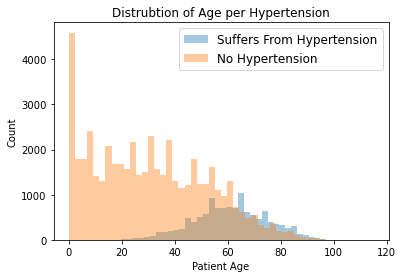

In [42]:
d_m = patient_df[patient_df['Hypertension']]
sns.distplot(d_m['Age'],kde=False, label='Suffers From Hypertension')
d_f = patient_df[patient_df['Hypertension']==False]
sns.distplot(d_f['Age'],kde=False, label='No Hypertension')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Age per Hypertension')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

We can see that patient that suffer from hypertension are quite normally distributed with an average age of 60 years old. This result is quite logical. 

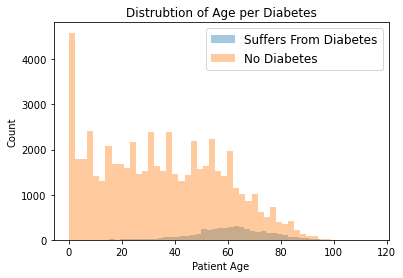

In [43]:
d_m = patient_df[patient_df['Diabetes']]
sns.distplot(d_m['Age'],kde=False, label='Suffers From Diabetes')
d_f = patient_df[patient_df['Diabetes']==False]
sns.distplot(d_f['Age'],kde=False, label='No Diabetes')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Age per Diabetes')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

The young patients could also suffer from diabetes. However, the graph shows that the age of patients that suffer from diabetes is normally distributed with an average age of around 60.

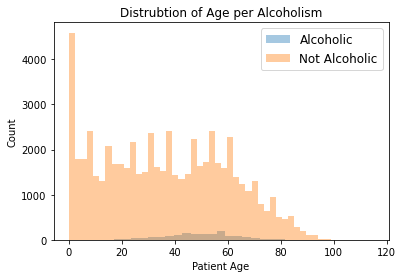

In [44]:
d_m = patient_df[patient_df['Alcoholism']]
sns.distplot(d_m['Age'],kde=False, label='Alcoholic')
d_f = patient_df[patient_df['Alcoholism']==False]
sns.distplot(d_f['Age'],kde=False, label='Not Alcoholic')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Age per Alcoholism')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

It seems like the alcoholism problems start showing up after the age of 25. However, we cannot interpret these results because the number of alcoholics is so low. 

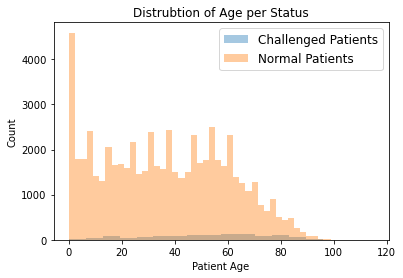

In [45]:
d_m = patient_df[patient_df['Handcap']]
sns.distplot(d_m['Age'],kde=False, label='Challenged Patients')
d_f = patient_df[patient_df['Handcap']==False]
sns.distplot(d_f['Age'],kde=False, label='Normal Patients')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Age per Status')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

We can see that the distribution of patient that are physically and/or mentally challenged is quite uniforme among all ages. The number of challenged patients is quite low compared to normal ones. 

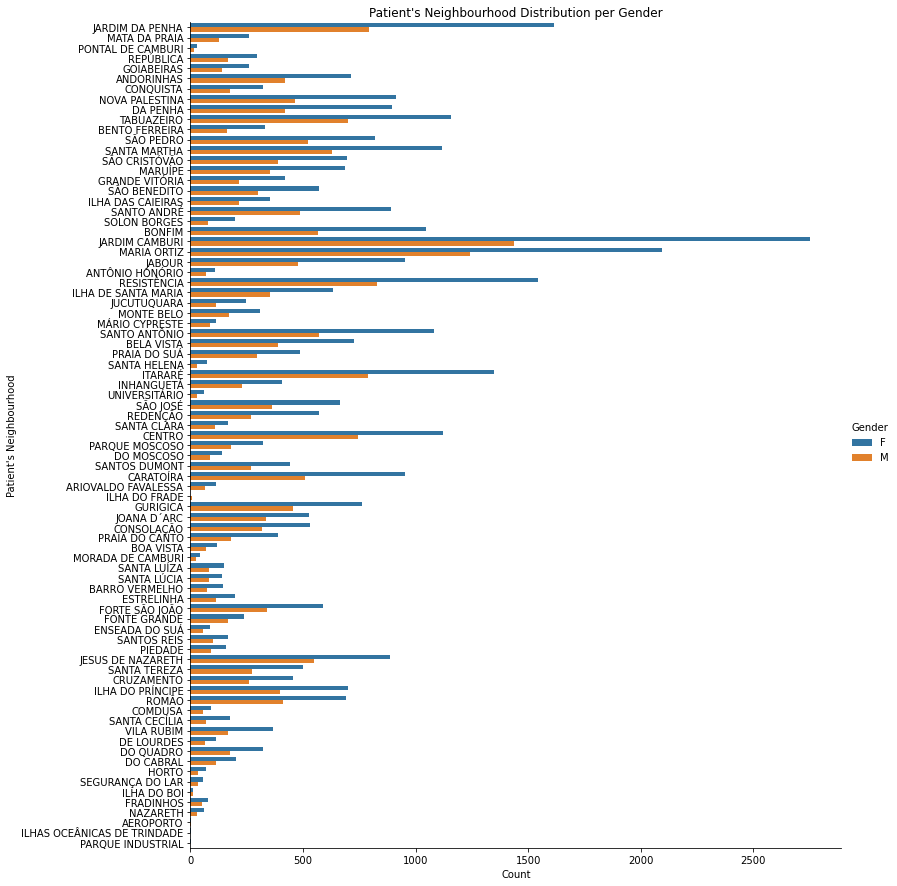

In [46]:
sns.catplot(y='Neighbourhood', data = patient_df, hue = 'Gender',
            kind='count', height=12)
plt.ylabel("Patient's Neighbourhood")
plt.xlabel("Count")
plt.title("Patient's Neighbourhood Distribution per Gender")
plt.show()

The graph shows that the distributions of male and female patients are quite similar.

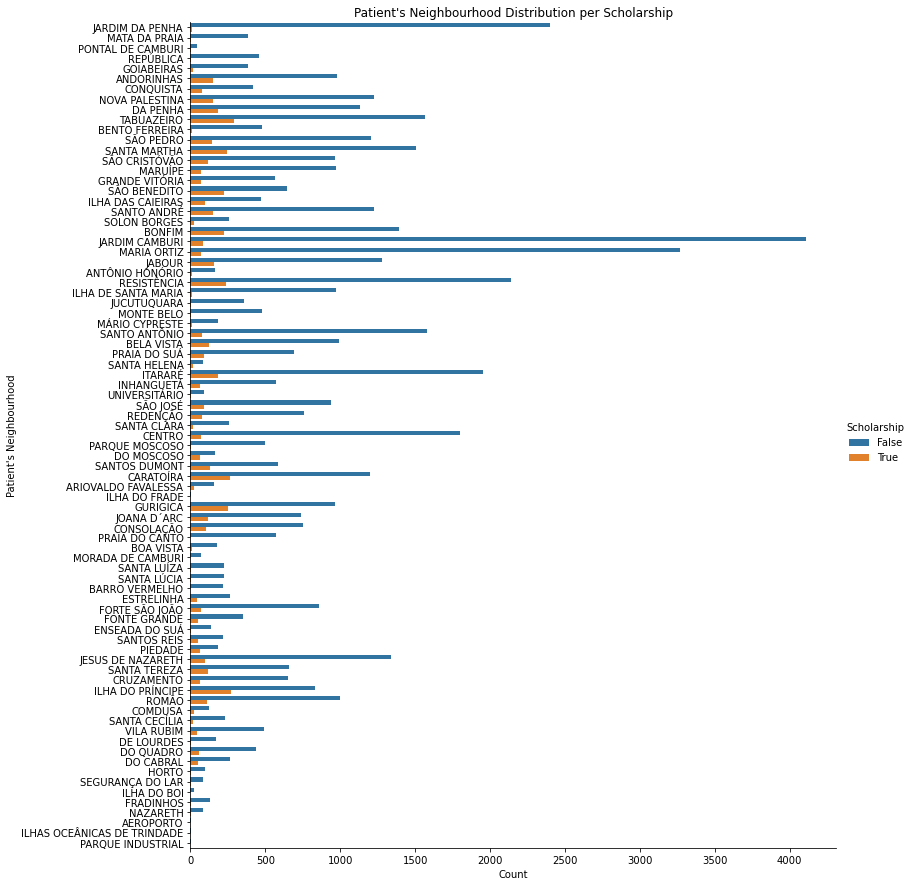

In [47]:
sns.catplot(y='Neighbourhood', data = patient_df, hue = 'Scholarship',
            kind='count', height=12)
plt.ylabel("Patient's Neighbourhood")
plt.xlabel("Count")
plt.title("Patient's Neighbourhood Distribution per Scholarship")
plt.show()

The patients that benefit from financial aids are quite concentrated in certain areas. We can see that Jardim Camburi has the highest number of patients but it does not present a large number of patients that benefit from the aids. It seems like Jardim Camburi is quite a good place to live as the biggest neighbourhood of the  Vitória city. I guess the people living there are quite rich. 

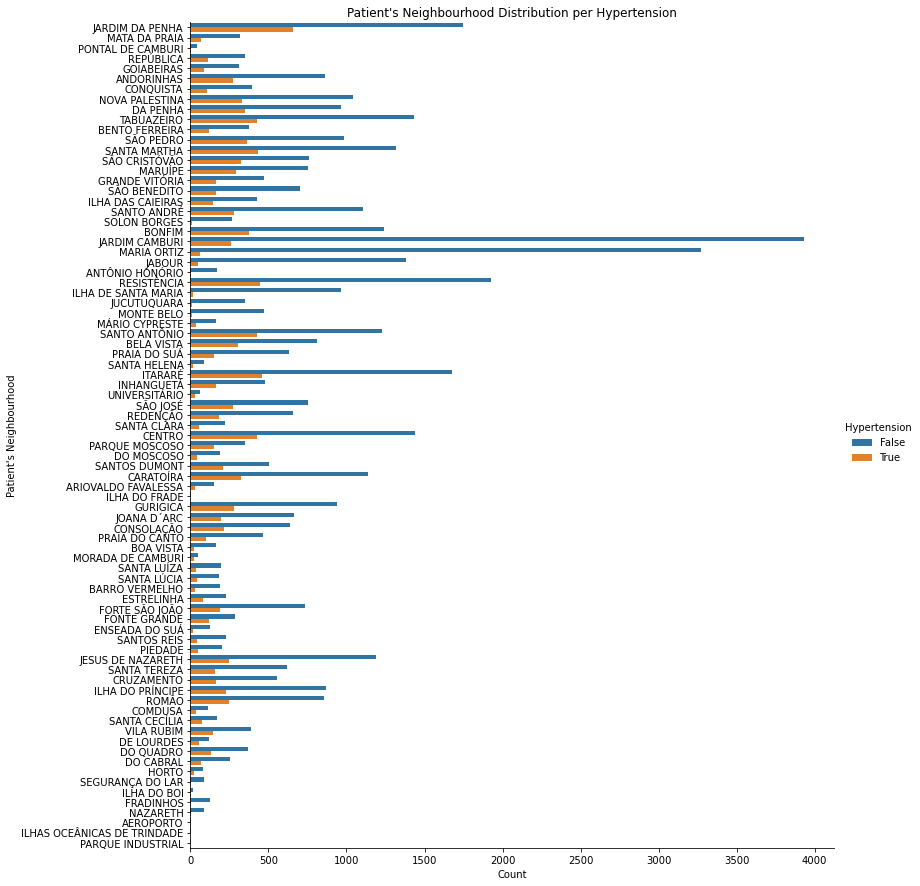

In [48]:
sns.catplot(y='Neighbourhood', data = patient_df, hue = 'Hypertension',
            kind='count', height=12)
plt.ylabel("Patient's Neighbourhood")
plt.xlabel("Count")
plt.title("Patient's Neighbourhood Distribution per Hypertension")
plt.show()

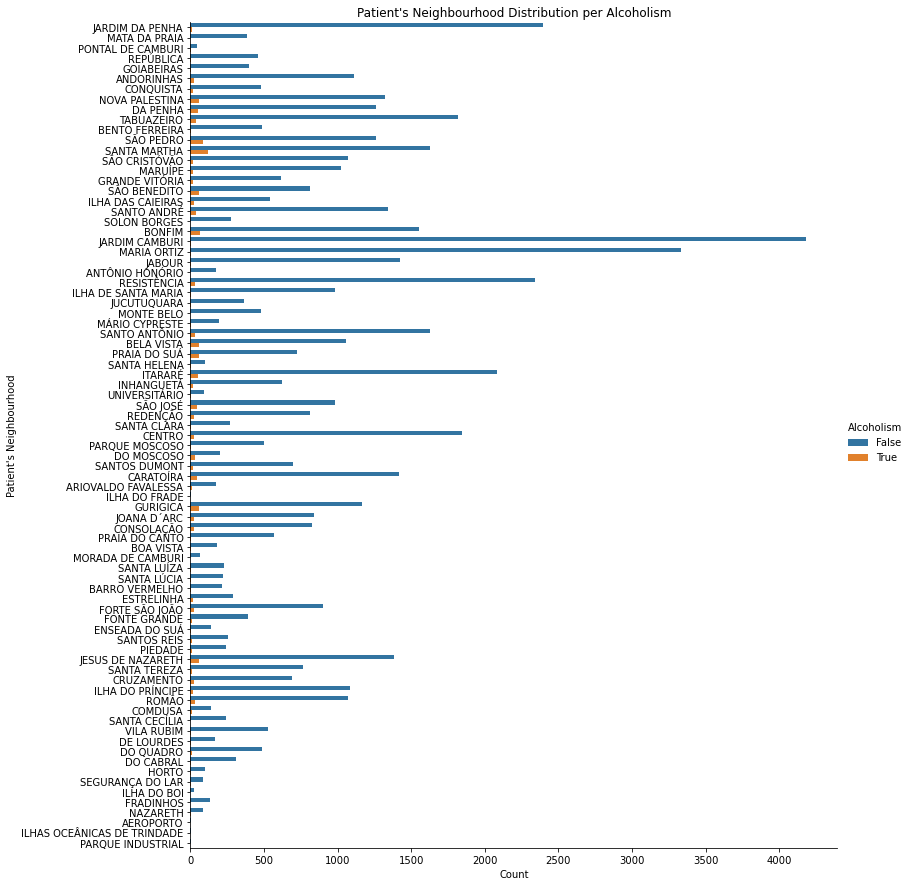

In [49]:
sns.catplot(y='Neighbourhood', data = patient_df, hue = 'Alcoholism',
            kind='count', height=12)
plt.ylabel("Patient's Neighbourhood")
plt.xlabel("Count")
plt.title("Patient's Neighbourhood Distribution per Alcoholism")
plt.show()

The alcoholism distribution has peak values in the same neighborhood in which we find alot of patients that benefit from the financial aid. This is quite an indicator of poor neighborhoods. 

### Bivariate Analysis (Appointment Table)

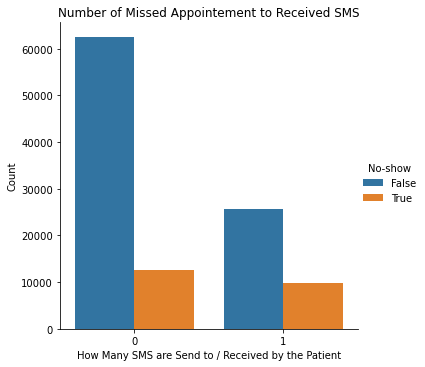

In [50]:
sns.catplot(x='SMS_received', data = appointment_df, kind='count', hue='No-show')
plt.xlabel("How Many SMS are Send to / Received by the Patient")
plt.ylabel("Count")
plt.title("Number of Missed Appointement to Received SMS")
plt.show()

It seems like the number of no-show when the patient receive a SMS represents almost 28% of all patients who received a SMS. While those who did not show up and did not receive a SMS is like 15% of all patients who did not receive a SMS. Looking at the results as it is seems to say that not sending a SMS is better. But I'm sure that the number of days between the call and the date of the appointment has a big influence on this result. Lets check this. 

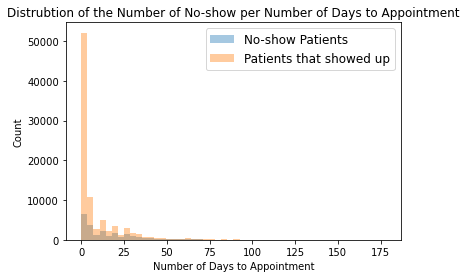

In [51]:
d_m = appointment_df[appointment_df['No-show']]
sns.distplot(d_m['DaysToAppointment'],kde=False, label='No-show Patients')
d_f = appointment_df[appointment_df['No-show']==False]
sns.distplot(d_f['DaysToAppointment'],kde=False, label='Patients that showed up')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of the Number of No-show per Number of Days to Appointment')
plt.xlabel('Number of Days to Appointment')
plt.ylabel('Count')
plt.show()

We can see that the distribution is quite similar. However the percentage of No-show compared to all patient of the same number of days seems to get bigger the longer the duration is between the appointment scheduling and the actual appointment day. This is intuitive because generally the appointments that are made the same day are quite 'urgent' so the patients will not miss it. 

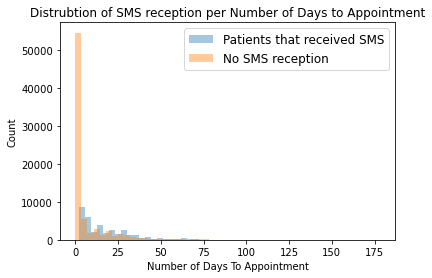

In [52]:
d_m = appointment_df[appointment_df['SMS_received']==1]
sns.distplot(d_m['DaysToAppointment'],kde=False, label='Patients that received SMS')
d_f = appointment_df[appointment_df['SMS_received']==0]
sns.distplot(d_f['DaysToAppointment'],kde=False, label='No SMS reception')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of SMS reception per Number of Days to Appointment')
plt.xlabel('Number of Days To Appointment')
plt.ylabel('Count')
plt.show()

The SMS sending service start operating when the number of days to appointment is greater or equal to one day. This service is a reminder thus no need to remind appointments that are scheduled in the same day. These appointments represents more than 50% of all appointments. This is the reason behind the results of sending SMS seems to have the inverse effect on reminding of the appointment. If we consider only appointments that have a duration greater or equal to one day the results should be more logical. Lets see this.

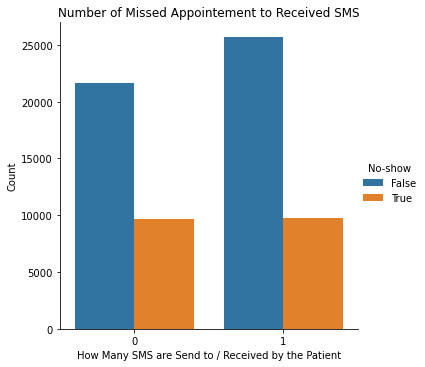

In [53]:
sns.catplot(x='SMS_received', data = appointment_df[appointment_df['DaysToAppointment']>0],
            kind='count', hue='No-show')
plt.xlabel("How Many SMS are Send to / Received by the Patient")
plt.ylabel("Count")
plt.title("Number of Missed Appointement to Received SMS")
plt.show()

As expected, when the appointement is scheduled for the next day or after, the proportion of patient missing their appointment while not receiving a SMS represents 31% of all patients that did not receive a SMS. On the other hand, those who did not show up while receiving a SMS represents 28% of all patients that received a SMS. Now we can see that sending a SMS seems to have an influence on missing the appointment. But is this influence is statistically significant? Lets check this out! 

In [54]:
import statsmodels.api as sm
d_f1 = appointment_df[appointment_df['DaysToAppointment']>0]
sms_1 = d_f1[d_f1['SMS_received']==1]
sms_0 = d_f1[d_f1['SMS_received']==0]
counts = np.array([sms_0.shape[0]-sms_0['No-show'].sum(), 
                   sms_1.shape[0]-sms_1['No-show'].sum()])
nobs = np.array([sms_0.shape[0], sms_1.shape[0]])
zstat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='smaller')
zstat, pval

(-9.11731487101492, 3.850429667360444e-20)

The test for the significance of sending a SMS for patient with appointment scheduled for at least one day away is as follow: 
* $H_0$: is that not receiving a SMS leads to higher show up rate than receiving a SMS
$$ H_0: p_{SMS} - p_{No-SMS} \leq 0 $$ 
* $H_1$: is that receiving a SMS leads to a better show up rate
$$ H_1: p_{SMS} > p_{No-SMS}$$

The obtained P-value is lower than 0.05 meaning that we reject the Null Hypothesis and thus sending a SMS to patient for appointments scheduled for at least one day away results in a higher show up rate.

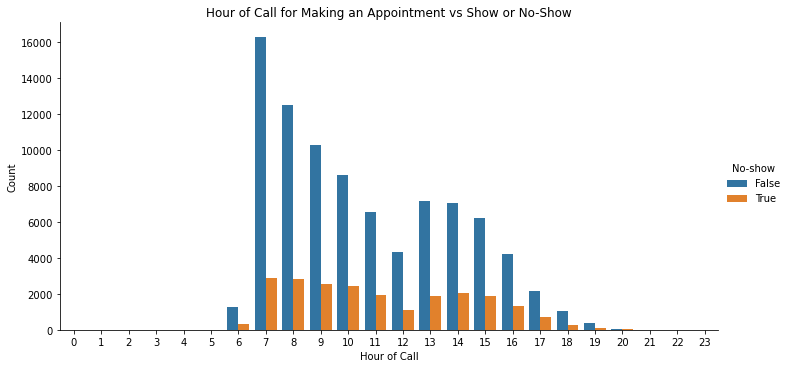

In [55]:
sns.catplot(x='CallHour', data = appointment_df, kind='count', order = range(24), hue='No-show', aspect=2)
plt.xlabel("Hour of Call")
plt.ylabel("Count")
plt.title("Hour of Call for Making an Appointment vs Show or No-Show")
plt.show()

Both distribution have the same shape. However, does the hour of calling to schedule an appointment has an influence of the patient showing up if the appointment is scheduled for the same day? Lets see:

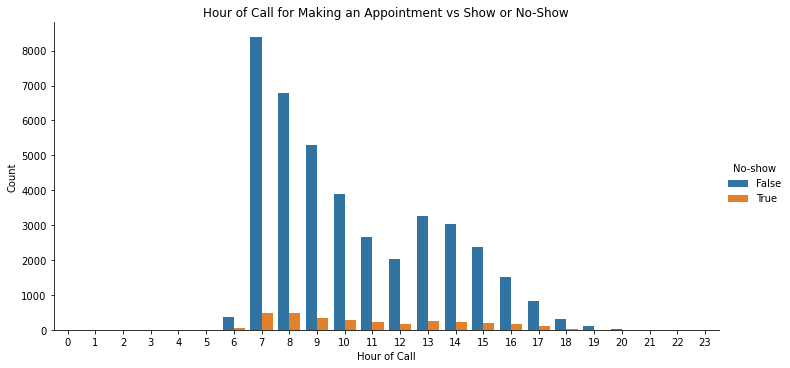

In [56]:
d_f1 = appointment_df[appointment_df['DaysToAppointment']==0]
sns.catplot(x='CallHour', data = d_f1, kind='count', order = range(24), hue='No-show', aspect=2)
plt.xlabel("Hour of Call")
plt.ylabel("Count")
plt.title("Hour of Call for Making an Appointment vs Show or No-Show")
plt.show()

It seems like it does not have an influence and both distributions are alike.

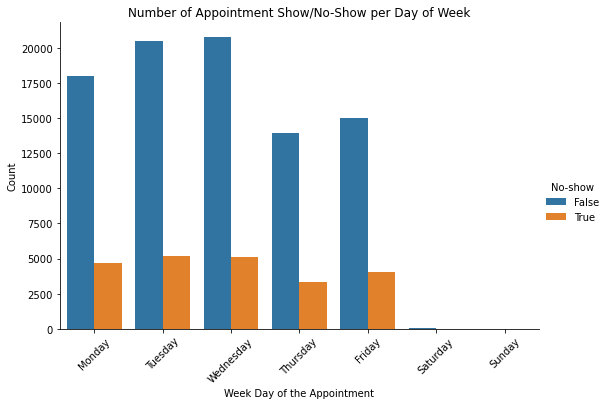

In [57]:
sns.catplot(x='Appointment_w_d', data = appointment_df, kind='count', order = weekDays, hue='No-show',
            aspect=1.5)
plt.xticks(rotation=45)
plt.xlabel("Week Day of the Appointment")
plt.ylabel("Count")
plt.title("Number of Appointment Show/No-Show per Day of Week")
plt.show()

Both distributions are quite similar. 

Lets combine both tables and see the relationships between the different features.

### Bivariate Analysis (Combined Table)

In [58]:
combined = appointment_df.merge(patient_df, on='PatientId')
combined.shape, appointment_df.shape, patient_df.shape

((110526, 17), (110526, 9), (62298, 9))

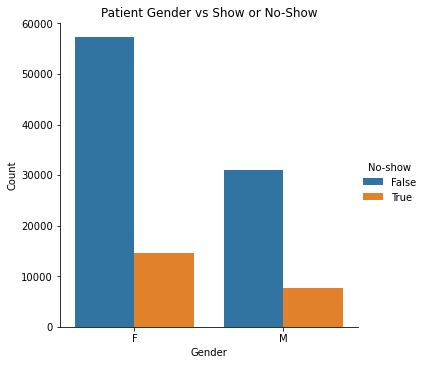

In [59]:
sns.catplot(x='Gender', data = combined, kind='count', hue='No-show')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Patient Gender vs Show or No-Show")
plt.show()

It seems like there could be a difference in the patient behaviour accourding to their gender. Lets check the significance of this result. 

In [60]:
counts = np.array([combined[combined['Gender']=='F'].shape[0]-combined[combined['Gender']=='F']['No-show'].sum(), 
                   combined[combined['Gender']=='M'].shape[0]-combined[combined['Gender']=='M']['No-show'].sum()])
nobs = np.array([combined[combined['Gender']=='F'].shape[0], combined[combined['Gender']=='M'].shape[0]])
zstat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='two-sided')
zstat, pval

(-1.3703734076681213, 0.1705703687461434)

The obtained p-value is bigger than 0.05. Hence, we fail to reject the null hypothesis that states that the gender has an influence of the showing up rate. 

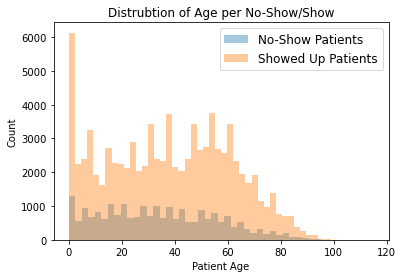

In [61]:
d_m = combined[combined['No-show']]
sns.distplot(d_m['Age'],kde=False, label='No-Show Patients')
d_f = combined[combined['No-show']==False]
sns.distplot(d_f['Age'],kde=False, label='Showed Up Patients')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Age per No-Show/Show')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

It seems like the showing up behaviour is independent of the age of the patient. This can be noted since the proportions of showing up or not are almost the same no matter the age.

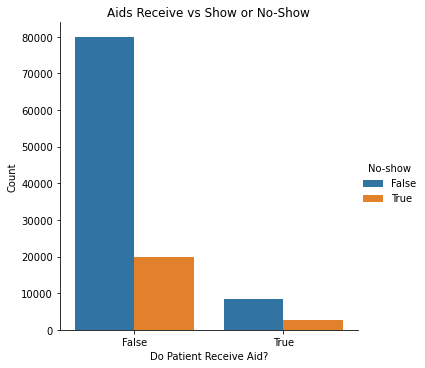

In [62]:
sns.catplot(x='Scholarship', data = combined, kind='count', hue='No-show')
plt.xlabel("Do Patient Receive Aid?")
plt.ylabel("Count")
plt.title("Aids Receive vs Show or No-Show")
plt.show()

The proportion of patients not showing up is almost the same for both groups. 

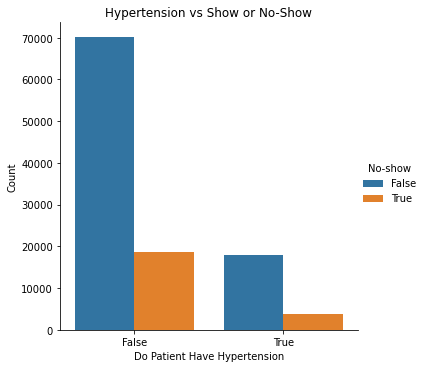

In [63]:
sns.catplot(x='Hypertension', data = combined, kind='count', hue='No-show')
plt.xlabel("Do Patient Have Hypertension")
plt.ylabel("Count")
plt.title("Hypertension vs Show or No-Show")
plt.show()

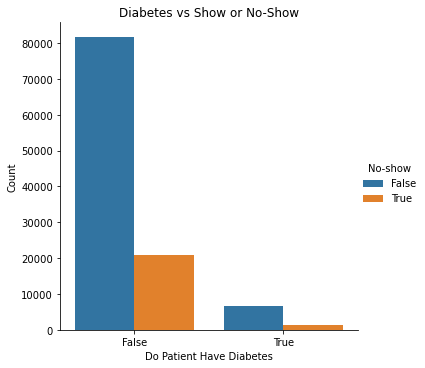

In [64]:
sns.catplot(x='Diabetes', data = combined, kind='count', hue='No-show')
plt.xlabel("Do Patient Have Diabetes")
plt.ylabel("Count")
plt.title("Diabetes vs Show or No-Show")
plt.show()

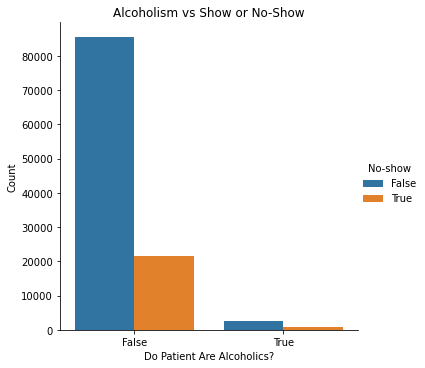

In [65]:
sns.catplot(x='Alcoholism', data = combined, kind='count', hue='No-show')
plt.xlabel("Do Patient Are Alcoholics?")
plt.ylabel("Count")
plt.title("Alcoholism vs Show or No-Show")
plt.show()

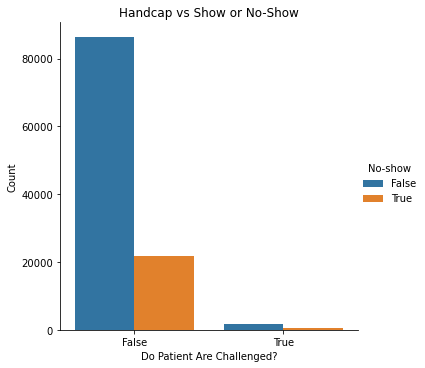

In [66]:
sns.catplot(x='Handcap', data = combined, kind='count', hue='No-show')
plt.xlabel("Do Patient Are Challenged?")
plt.ylabel("Count")
plt.title("Handcap vs Show or No-Show")
plt.show()

It is hard to tell if the Hypertension, Diabetes, Alcoholism, Handcap situation have a direct influence of the behaviour of the patient to show up or not. 

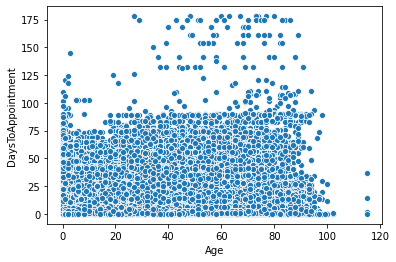

In [67]:
sns.scatterplot(x='Age', y='DaysToAppointment', data=combined)
plt.show()

Usually old patient do not take appointment that are planned well in advance. I exepected that the older the patient get the shortest the duration until the appointment be. However, I cannot conclude on this relationship based on the obtained scatter plot between the two variables.

### Multivariate Analysis (Combined table)

Sometimes the more variables that are included in the plots, the harder it gets to see and interpret the relationship between these variables. An example of this analysis is given in the next figure: 

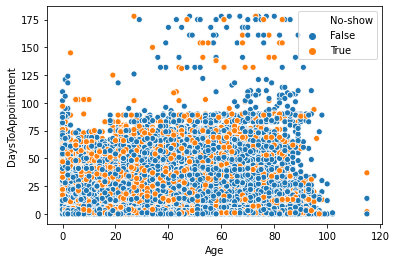

In [68]:
sns.scatterplot(x='Age', y='DaysToAppointment', hue = 'No-show', data=combined)
plt.show()

We can see that the show and no-show are quite distributed randomly in function of the age and the days to appointment. 

Another example of 3-variates analysis. 

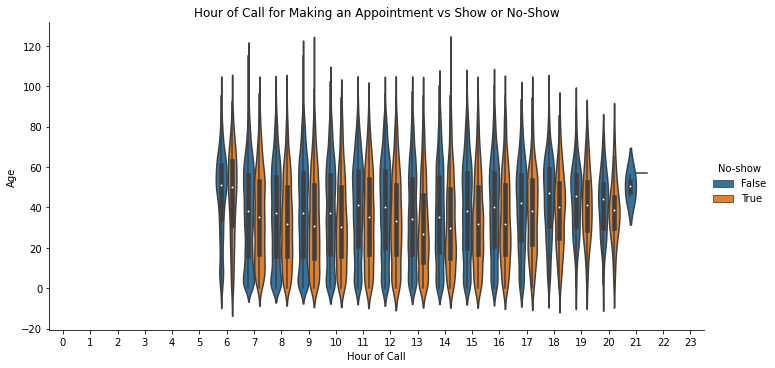

In [69]:
sns.catplot(x='CallHour', y='Age', hue='No-show', data = combined, 
            order = range(24), kind='violin', aspect=2)
plt.xlabel("Hour of Call")
plt.ylabel("Age")
plt.title("Hour of Call for Making an Appointment vs Show or No-Show")
plt.show()

We can see that the distribution of patients' age is quite the same between those who show up and those who do not according to the hour they call for appointment scheduling.

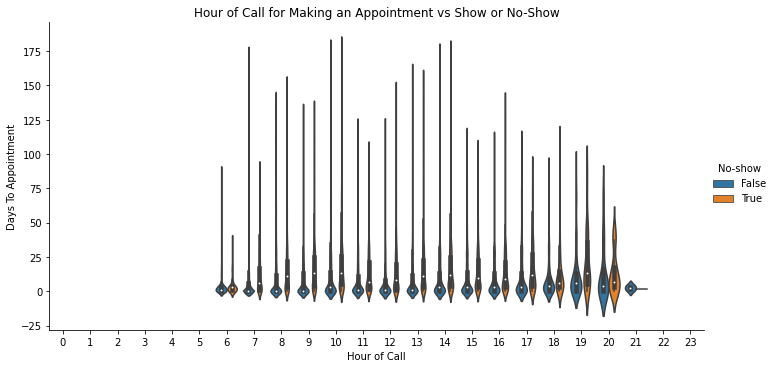

In [70]:
sns.catplot(x='CallHour', y='DaysToAppointment', hue='No-show', data = combined, 
            order = range(24), kind='violin', aspect=2)
plt.xlabel("Hour of Call")
plt.ylabel("Days To Appointment")
plt.title("Hour of Call for Making an Appointment vs Show or No-Show")
plt.show()

We can see that the duration until the appointment is quite different between those who show up and those who do not according to the hour they call for appointment scheduling. It seems like the distribution of those who will not show up is quite larger that those who will. 

# Modeling

One of the objectives behind analyzing data is to build a predictive model. A good data analysis process allows us to obtain clean datasets and a deep understanding of the features. In this part, I propose to build some classification models and study the importance of the features on the performance of the models. 

Before starting the modeling part, we need to transform the data to be used in models. First, the models can, in most cases, only deal with numeric variables. 
* So we transform all the boolean variables to numeric. 
* The gender feature is transformed to numeric by giving 1 to Male genders and 0 to Female.
* The Appointment_w_d is transformed into dummy variables with baseline 'Monday'
* Also the neighbourhood variable is a string. This variable is transformed into dummy variables with baseline the neighbourhood of 'JARDIM CAMBURI'.

In [71]:
X = combined[['SMS_received', 'Appointment_w_d', 'DaysToAppointment',
              'CallHour', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
              'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap']]
y = combined['No-show']

In [72]:
X.dtypes

SMS_received          int64
Appointment_w_d      object
DaysToAppointment     int64
CallHour              int64
Gender               object
Age                   int64
Neighbourhood        object
Scholarship            bool
Hypertension           bool
Diabetes               bool
Alcoholism             bool
Handcap                bool
dtype: object

In [73]:
X[['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap']]=X[['Scholarship', 'Hypertension', 'Diabetes', 
                                                                           'Alcoholism', 'Handcap']].astype('int32')
X.dtypes

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


SMS_received          int64
Appointment_w_d      object
DaysToAppointment     int64
CallHour              int64
Gender               object
Age                   int64
Neighbourhood        object
Scholarship           int32
Hypertension          int32
Diabetes              int32
Alcoholism            int32
Handcap               int32
dtype: object

In [74]:
X['Gender'] = X['Gender'].apply(lambda x : 1 if x=='M' else 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
X = pd.get_dummies(X, columns=['Neighbourhood', 'Appointment_w_d'])
X.drop(['Neighbourhood_JARDIM CAMBURI', 'Appointment_w_d_Monday'], axis=1, inplace=True)
X.head(2)

,SMS_received,DaysToAppointment,CallHour,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,Appointment_w_d_Friday,Appointment_w_d_Saturday,Appointment_w_d_Thursday,Appointment_w_d_Tuesday,Appointment_w_d_Wednesday
0,0,0,18,0,62,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,9,0,62,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
y = y.astype('int32')

## Evaluation of Models: 

In [77]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

#### Using all available features

In [80]:
RFC = RandomForestClassifier(n_estimators=150, random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [81]:
print(confusion_matrix(y_test, RFC.predict(X_test)))

[[25193  1313]
 [ 5528  1124]]


In [82]:
print(classification_report(y_test, RFC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     26506
           1       0.46      0.17      0.25      6652

    accuracy                           0.79     33158
   macro avg       0.64      0.56      0.56     33158
weighted avg       0.75      0.79      0.75     33158



We can see from the confusion matrix that the random forest model couldn't detect the patients that would miss their appointments. Although the model could only detect 17% of patients of this class, the accuracy score of the model is quite high 79%. This is a well known issue in the classification problems. Therefore, we should not focus only on the accuracy to compare and select the suitable model. F1-score balances the performance between the percision and the recall capacity. It is more adequate to compare models according to their Macro F1 Score. 

Lets analyze the importance of the features according to the random forest model.

In [83]:
rfc_features = pd.DataFrame()
rfc_features['Feature'] = X_train.columns.tolist()
rfc_features['Importance'] = RFC.feature_importances_

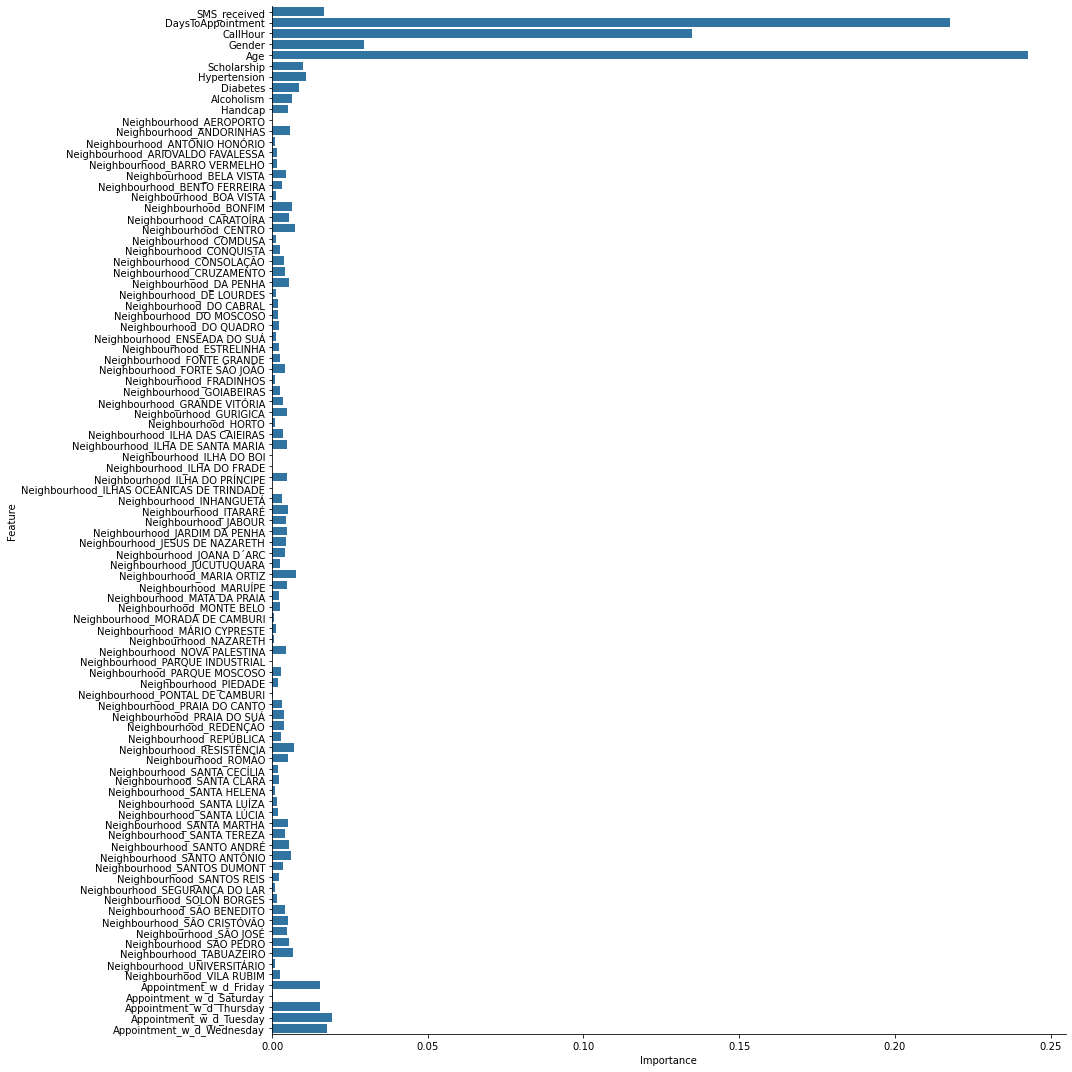

In [84]:
sns.catplot(y='Feature', x='Importance', data=rfc_features, kind='bar', height=15, color=base_color)
plt.show()

We can see that the neighbourhoods do not have a big influence in the classification process by random forest. Lets drop these features and see how this influences the performance of the model.

#### Using only important features to Random Forest

In [85]:
cols_to_drop =[x for x in X_train.columns.tolist() if 'Neighb' in x]
X_train_rf = X_train.drop(cols_to_drop, axis=1)
X_test_rf = X_test.drop(cols_to_drop, axis=1)

In [86]:
RFC2 = RandomForestClassifier(n_estimators=150, random_state=0)
RFC2.fit(X_train_rf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
print(confusion_matrix(y_test, RFC2.predict(X_test_rf)))

[[24146  2360]
 [ 5356  1296]]


In [88]:
print(classification_report(y_test, RFC2.predict(X_test_rf)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     26506
           1       0.35      0.19      0.25      6652

    accuracy                           0.77     33158
   macro avg       0.59      0.55      0.56     33158
weighted avg       0.73      0.77      0.74     33158



We can see that using only the important features boosted the recall of No-Show patients. However, the precision of this class dropped. This is caused by the fact that the system tends to classify more patients as no-show. The accuracy dropped to 77% while the F1-score remained the same.

To conclude, we did not gain anything by reducing the features.

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

#### Using all available features

In [90]:
LR = LogisticRegression(random_state=0, solver='saga')
LR.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
print(confusion_matrix(y_test, LR.predict(X_test)))

[[26280   226]
 [ 6538   114]]


In [92]:
print(classification_report(y_test, LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26506
           1       0.34      0.02      0.03      6652

    accuracy                           0.80     33158
   macro avg       0.57      0.50      0.46     33158
weighted avg       0.71      0.80      0.71     33158



At first sight of the accuracy, we can conclude that this model is better than the random forest because the accuracy is 80%. However, if we look at the confusion matrix, we can see that the logistic regression model is biaised. It tends to classify all patients as Show-Patients (i.e. they will show up for their appointment). Moreover, when we compare the F1-Score we can see that the F1 score of logistic regression is 0.46 lower than 0.56 of the random forest. 

## XGBoost

In [93]:
from xgboost import XGBClassifier

#### Using all available features

In [94]:
# XGB = XGBClassifier(n_estimators=1000)
# XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [95]:
# print(confusion_matrix(y_test, XGB.predict(X_test)))

[[24713  1793]
 [ 5222  1430]]


In [96]:
# print(classification_report(y_test, XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     26506
           1       0.44      0.21      0.29      6652

    accuracy                           0.79     33158
   macro avg       0.63      0.57      0.58     33158
weighted avg       0.75      0.79      0.76     33158



Based on the F1 score, the XGB model is so far the best model. 

## CatBoost

In [97]:
# from catboost import CatBoostClassifier

#### Using all available features

In [98]:
# CAT = CatBoostClassifier(iterations=2500)
# CAT.fit(X_train,y_train)

Learning rate set to 0.028473
0:	learn: 0.6782834	total: 80ms	remaining: 3m 20s
1:	learn: 0.6629766	total: 107ms	remaining: 2m 13s
2:	learn: 0.6487069	total: 132ms	remaining: 1m 49s
3:	learn: 0.6354616	total: 154ms	remaining: 1m 36s
4:	learn: 0.6231540	total: 179ms	remaining: 1m 29s
5:	learn: 0.6124589	total: 204ms	remaining: 1m 24s
6:	learn: 0.6025003	total: 229ms	remaining: 1m 21s
7:	learn: 0.5923801	total: 253ms	remaining: 1m 18s
8:	learn: 0.5830750	total: 291ms	remaining: 1m 20s
9:	learn: 0.5745378	total: 325ms	remaining: 1m 20s
10:	learn: 0.5665190	total: 359ms	remaining: 1m 21s
11:	learn: 0.5599794	total: 395ms	remaining: 1m 21s
12:	learn: 0.5537506	total: 427ms	remaining: 1m 21s
13:	learn: 0.5476089	total: 460ms	remaining: 1m 21s
14:	learn: 0.5421885	total: 496ms	remaining: 1m 22s
15:	learn: 0.5364176	total: 529ms	remaining: 1m 22s
16:	learn: 0.5309563	total: 563ms	remaining: 1m 22s
17:	learn: 0.5258609	total: 598ms	remaining: 1m 22s
18:	learn: 0.5210437	total: 631ms	remaining: 

In [99]:
# print(confusion_matrix(y_test, CAT.predict(X_test)))

[[26151   355]
 [ 6249   403]]


In [100]:
# print(classification_report(y_test, CAT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     26506
           1       0.53      0.06      0.11      6652

    accuracy                           0.80     33158
   macro avg       0.67      0.52      0.50     33158
weighted avg       0.75      0.80      0.73     33158



We can see that the CATboost model is also biaised. Most of the patients are classified into the Show-Patient category. The accuracy score is still high 80% but the model presents a low F1 score 0.5.

## Model Comparison & Discussion

#### Using all available features

In [101]:
fpr_RFC, tpr_RFC, _ = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
roc_auc_RFC = auc(fpr_RFC, tpr_RFC)
fpr_LR, tpr_LR, _ = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
roc_auc_LR = auc(fpr_LR, tpr_LR)
# fpr_XGB, tpr_XGB, _ = roc_curve(y_test, XGB.predict_proba(X_test)[:,1])
# roc_auc_XGB = auc(fpr_XGB, tpr_XGB)
# fpr_CAT, tpr_CAT, _ = roc_curve(y_test, CAT.predict_proba(X_test)[:,1])
# roc_auc_CAT = auc(fpr_CAT, tpr_CAT)

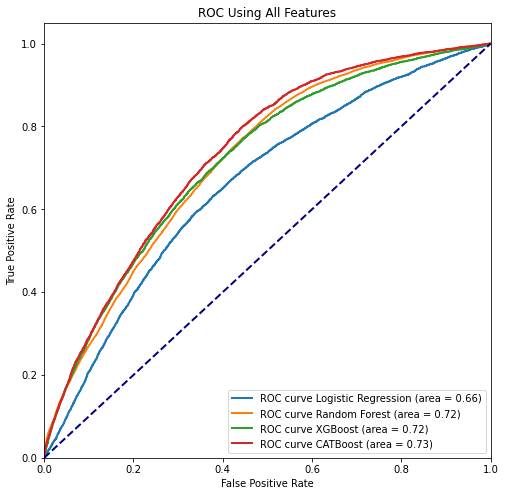

In [102]:
# plt.figure(figsize=(8,8))
# lw = 2
# plt.plot(fpr_LR, tpr_LR, 
#          lw=lw, label='ROC curve Logistic Regression (area = %0.2f)' % roc_auc_LR)
# plt.plot(fpr_RFC, tpr_RFC, 
#          lw=lw, label='ROC curve Random Forest (area = %0.2f)' % roc_auc_RFC)
# plt.plot(fpr_XGB, tpr_XGB, 
#          lw=lw, label='ROC curve XGBoost (area = %0.2f)' % roc_auc_XGB)
# plt.plot(fpr_CAT, tpr_CAT, 
#          lw=lw, label='ROC curve CATBoost (area = %0.2f)' % roc_auc_CAT)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Using All Features')
# plt.legend(loc="lower right")
# plt.show()

When we analyze the performance using the ROC we want to select the model that has the higher curve the one that reaches 1 very quicky and the one with the highest area undercurve. When looking at the obtained graph we can see that the CATboost model is the best one in these criterias. However, previously, we saw that the CATBoost model is biaised and its F1-Score is not good. This problem is caused by the fact that the dataset is not balanced from the beginning. The initial dataset contained 30% of no-show against 70% of show. And when we analyzed the data, we could not find very clear criterion that affects the show of no show of the patients to their appointments. 

I propose to use the XGBoost model to predict if a patient will show up or not to their appointment. However, we should try to collect more information/data about the process of show or no-show to build a better model. 